In [6]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# GitHub CSV file URL
url = 'https://raw.githubusercontent.com/avisokay/va_nlp/main/data/phmrc/phmrc_adult_tokenized.csv'
df = pd.read_csv(url)

In [16]:
sites = df['site'].unique()

In [21]:
test = pd.read_csv('../src/classic_nlp/classic_predictions_ex_ap.csv')

In [24]:
# read in classic predictions files
file_pattern = '../src/classic_nlp/classic_predictions_ex_*.csv'
csv_files = glob.glob(file_pattern)

# Create a dictionary to store DataFrames
dfs = {site: pd.read_csv(site) for site in csv_files}


# Access the DataFrames using site names
for site, df in dfs.items():
    print(f"DataFrame for {site}:")
    print(df)

DataFrame for ../src/classic_nlp/classic_predictions_ex_bohol.csv:
      Unnamed: 0  Y  X_unlabeled  Yhat_NB  Yhat_SVM  Yhat_KNN
0              0  1           51        1         1         1
1              1  3           24        3         3         3
2              2  1           62        3         1         1
3              3  3           80        3         3         4
4              4  3           76        3         3         3
...          ... ..          ...      ...       ...       ...
9984         883  3           35        3         3         3
9985         884  1           83        3         1         3
9986         885  3           17        3         3         3
9987         886  3           20        3         3         3
9988         887  1           60        3         3         3

[9989 rows x 6 columns]
DataFrame for ../src/classic_nlp/classic_predictions_ex_dar.csv:
       Unnamed: 0  Y  X_unlabeled  Yhat_NB  Yhat_SVM  Yhat_KNN
0               0  3           51   

## Manually create results plot comparing accuracy and F1 for classic, bert, GPT-4 with non-classified and without.

In [39]:
accuracy_scores = [0.52, 0.62, 0.55, 0.55, 0.38]
f1_scores = [0.64, 0.67, 0.58, 0.71, 0.45]
columns_to_evaluate = ['NB', 'SVM', 'KNN', 'BERT', 'GPT4_zeroshot']

In [41]:
accuracy_scores = [0.52, 0.62, 0.55, 0.55, 0.75]
f1_scores = [0.64, 0.67, 0.58, 0.71, 0.73]
columns_to_evaluate = ['NB', 'SVM', 'KNN', 'BERT', 'GPT4_zeroshot']

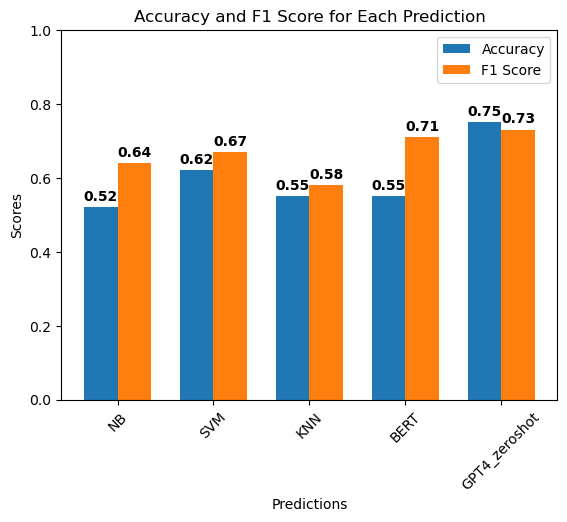

In [42]:
# Plot the results
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(columns_to_evaluate))

bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Predictions')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score for Each Prediction')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns_to_evaluate)
plt.xticks(rotation=45)
ax.legend()
# Set y-axis range to 0-1
ax.set_ylim(0, 1)

# Add scores on top of each bar
for i, (acc, f1) in enumerate(zip(accuracy_scores, f1_scores)):
    ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
    ax.text(i + bar_width, f1 + 0.01, f'{f1:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

## read in classic results and break into csv, save to results folder


In [43]:
for site in sites:
    print(site)

mexico
ap
up
dar
bohol
pemba


In [57]:
test = pd.read_csv('../src/classic_nlp/classic_predictions_ex_mexico.csv')

In [58]:
test

,Y,X_unlabeled,Yhat_NB,Yhat_SVM,Yhat_KNN
0,4,51,4,2,2
1,0,24,4,4,4
2,4,62,4,4,4
3,2,80,4,4,0
4,4,76,4,2,4
...,...,...,...,...,...
1301,4,30,4,4,4
1302,4,23,4,4,4
1303,4,16,4,2,4
1304,2,76,4,2,4


In [63]:
nb_out = test[['Y', 'X_unlabeled', 'Yhat_KNN']]
nb_out = nb_out.rename(columns={'X_unlabeled':'X',
                                      'Yhat_KNN':'Y_hat'

})

In [64]:
nb_out.to_csv('../data/results/mexico_KNN.csv', index=False)